In [101]:
from pandas import read_excel,DataFrame,melt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
import os 

#### 데이터 가져오기

자동차의 속도(speed)에 따른 제동거리(dist) 조사 데이터

In [4]:
os.getcwd()

'c:\\Users\\yis82\\OneDrive\\Desktop\\bigdata_analysis\\F DataMining\\02.SKlearn'

In [9]:
origin = read_excel('cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 분석 알고리즘을 포함하고 있는 객체 생성

In [10]:
model = LinearRegression()

#### 분석모델을 학습시킴
`fit(독립변수, 종속변수)` 형태로 사용

직접 데이터를 파라미터로 전달할 경우

 1. 2차원 배열(numpy)설정
 2. 완전한 데이터 프레임 형태로 전달

In [13]:
fit = model.fit(origin[['speed']], origin[['dist']])
fit

LinearRegression()

직선의 기울기

In [14]:
coef  = fit.coef_
coef

array([[3.93240876]])

In [15]:
coef[0][0]

3.9324087591240873

직선의 절편

In [24]:
intercept = fit.intercept_
intercept

array([-17.57909489])

In [25]:
intercept[0]

-17.57909489051095

#### 회귀식 추정

In [30]:
print("y = {0:.2f}X + {1:.2f}".format(coef[0][0], intercept[0]))

y = 3.93X + -17.58


#### 설명력

In [31]:
rscore = fit.score(origin[['speed']], origin[['dist']])
rscore

0.6510793807582509

In [32]:
print("설명력: {:.1%}".format(rscore))

설명력: 65.1%


#### 회귀분석 결과 활용

##### 모델을 활용한 결과값 얻기

In [33]:
speed = [[10], [15], [20], [25], [30], [35], [40]]
pred = fit.predict(speed)
pred

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 21.7449927 ],
       [ 41.4070365 ],
       [ 61.06908029],
       [ 80.73112409],
       [100.39316788],
       [120.05521168],
       [139.71725547]])

### 다중 선형 회귀

In [35]:
df2 = read_excel("boston.xlsx")
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


##### 독립변수 추출

In [38]:
 X = df2[["CRIM", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]]
 y = df2[["MEDV"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
model = LinearRegression()
fit = model.fit(X_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("설명력: ", fit.score(X_train, y_train))

print("y = {0:.2f} * X + {1:.2f}".format(coef[0][0], intercept[0]))


계수:  [[-7.25720063e-02 -7.37856835e-02  2.53370293e+00 -1.78284609e+01
   3.60432548e+00 -3.54050922e-03 -1.15753946e+00  4.64793373e-03
  -1.04852324e+00  6.37821832e-03 -5.25292283e-01]]
절편:  [37.23498637]
설명력:  0.7122385491923894
y = 3.93 * X + -17.58


#### 검증 데이터로 y값 예측

In [54]:
y_pred = model.predict(X_test)


24.53100150562028

In [102]:
x = list(range(len(y_pred)))
y1 = y_pred[:, 0]
y2 = y_test[:,0]
# data = DataFrame({'X': x, "y_pred":y1,"y_test":y2})
# mdf = melt(data, id_vars=['X'], value_vars=['y_pred', 'y_test'])
# print(mdf)

       X variable      value
0      0   y_pred  29.723625
1      1   y_pred  27.650645
2      2   y_pred  18.510891
3      3   y_pred  23.138527
4      4   y_pred  17.446799
..   ...      ...        ...
199   97   y_test  22.900000
200   98   y_test  44.800000
201   99   y_test  21.700000
202  100   y_test  10.200000
203  101   y_test  15.400000

[204 rows x 3 columns]


#### 잔차 플롯 시각화

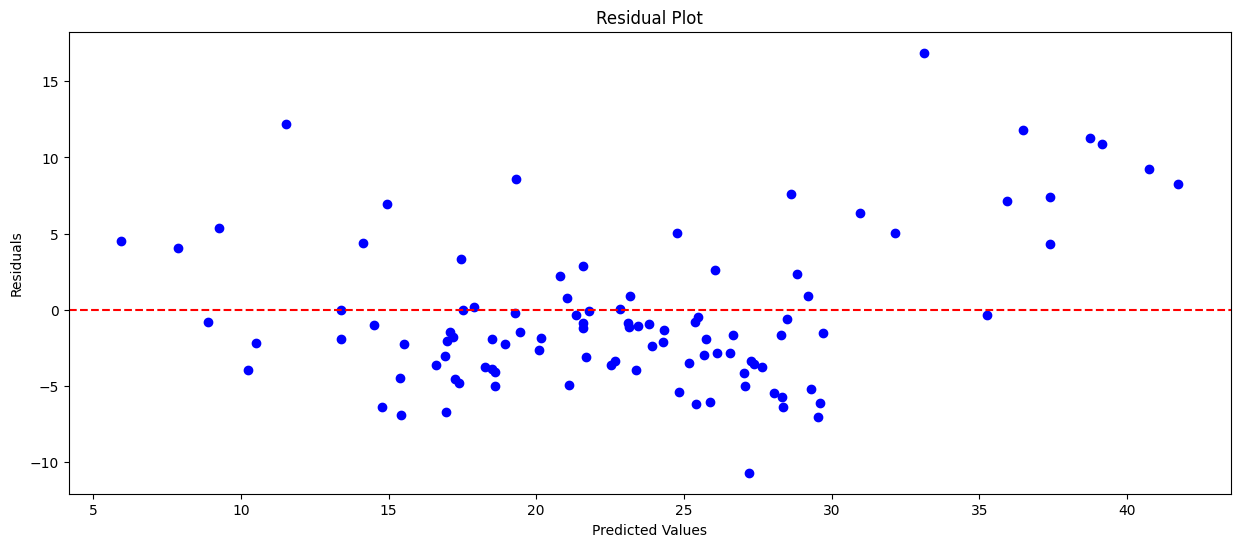

In [115]:
residuals = y2 - y1
plt.figure(figsize=(15,6))
plt.scatter(y1, residuals, color='blue', marker='o')
plt.axhline(y = 0,color = 'red', linestyle= '--', label = "zero residual")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
    
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 24.53100150562028
Mean Absolute Error: 3.873998837733023
